![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/colab/Training/multi_class_text_classification/NLU_training_multi_class_text_classifier_demo.ipynb)



# Training a Deep Learning Classifier with NLU 
## ClassifierDL (Multi-class Text Classification)
With the [ClassifierDL model](https://nlp.johnsnowlabs.com/docs/en/annotators#classifierdl-multi-class-text-classification) from Spark NLP you can achieve State Of the Art results on any multi class text classification problem 

This notebook showcases the following features : 

- How to train the deep learning classifier
- How to store a pipeline to disk
- How to load the pipeline from disk (Enables NLU offline mode)


You can achieve these results or even better on this dataset with training data:

<br>

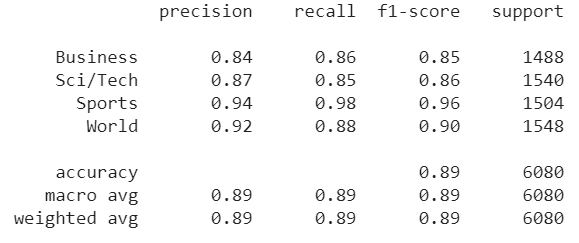

You can achieve these results or even better on this dataset with test data:


<br>

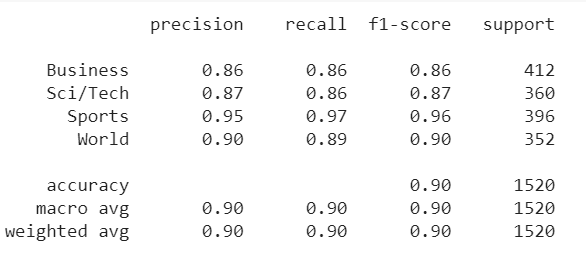




# 1. Install Java 8 and NLU

In [ ]:
!wget https://setup.johnsnowlabs.com/nlu/colab.sh -O - | bash
  

import nlu

--2021-05-05 04:15:34--  https://raw.githubusercontent.com/JohnSnowLabs/nlu/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1671 (1.6K) [text/plain]
Saving to: ‘STDOUT’

-                     0%[                    ]       0  --.-KB/s               Installing  NLU 3.0.0 with  PySpark 3.0.2 and Spark NLP 3.0.1 for Google Colab ...
-                   100%[===================>]   1.63K  --.-KB/s    in 0.001s  

2021-05-05 04:15:35 (2.03 MB/s) - written to stdout [1671/1671]

     |████████████████████████████████| 204.8MB 77kB/s 
     |████████████████████████████████| 153kB 57.3MB/s 
     |████████████████████████████████| 204kB 23.0MB/s 
     |████████████████████████████████| 204kB 63.1MB/s 


# 2. Download news classification dataset

In [ ]:
! wget https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/classifier-dl/news_Category/news_category_train.csv
! wget https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/classifier-dl/news_Category/news_category_test.csv

--2021-05-05 04:17:30--  https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/classifier-dl/news_Category/news_category_train.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.81.46
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.81.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24032125 (23M) [text/csv]
Saving to: ‘news_category_train.csv’

news_category_train 100%[===================>]  22.92M  17.6MB/s    in 1.3s    

2021-05-05 04:17:31 (17.6 MB/s) - ‘news_category_train.csv’ saved [24032125/24032125]

--2021-05-05 04:17:31--  https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/classifier-dl/news_Category/news_category_test.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.26.150
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.26.150|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1504408 (1.4M) [text/csv]
Saving to: ‘news_category_test.csv’

news_categor

In [ ]:
import pandas as pd
test_path = '/content/news_category_test.csv'
train_df = pd.read_csv(test_path)
train_df.columns=['y','text']
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(train_df, test_size=0.2)
train_df

,y,text
2233,Business,"Steven Woghin, the former general counsel of C..."
5970,Sports,The US mens national team will look to extend ...
3706,Sci/Tech,The Federal Trade Commission formally announce...
6985,World,TOKYO (AP) Japan's economy barely grew duri...
750,World,Nervous Republicans are urging President Bush...
...,...,...
1537,World,The United States piled pressure on Sudan Wed...
2196,Sci/Tech,Ask Jeeves Search Engine Gets Slim and Persona...
553,Sports,Slumping Cleveland lost a three-run lead while...
3406,Business,Advanced Micro Devices Inc. reported a third ...


# 3. Train Deep Learning Classifier using nlu.load('train.classifier')

By default, the Universal Sentence Encoder Embeddings (USE) are beeing downloaded to provide embeddings for the classifier. You can use any of the 50+ other sentence Emeddings in NLU tough!

You dataset label column should be named 'y' and the feature column with text data should be named 'text'

In [ ]:
# load a trainable pipeline by specifying the train. prefix  and fit it on a datset with label and text columns
# Since there are no
fitted_pipe = nlu.load('train.classifier').fit(train_df)

# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df,output_level = 'document')
preds

tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]


,document,text,trained_classifier_confidence_confidence,origin_index,sentence,y,trained_classifier,sentence_embedding_use
0,"Steven Woghin, the former general counsel of C...","Steven Woghin, the former general counsel of C...",0.997040,2233,"[Steven Woghin, the former general counsel of ...",Business,Business,"[0.035635482519865036, -0.048168957233428955, ..."
1,The US mens national team will look to extend ...,The US mens national team will look to extend ...,1.000000,5970,[The US mens national team will look to extend...,Sports,Sports,"[0.0012551577528938651, -0.04456636682152748, ..."
2,The Federal Trade Commission formally announce...,The Federal Trade Commission formally announce...,1.000000,3706,[The Federal Trade Commission formally announc...,Sci/Tech,Sci/Tech,"[0.010981663130223751, -0.059497587382793427, ..."
3,TOKYO (AP) Japan's economy barely grew during ...,TOKYO (AP) Japan's economy barely grew duri...,0.999996,6985,[TOKYO (AP) Japan's economy barely grew during...,World,Business,"[0.0031178640201687813, -0.0026406561955809593..."
4,Nervous Republicans are urging President Bush ...,Nervous Republicans are urging President Bush...,0.999992,750,[Nervous Republicans are urging President Bush...,World,World,"[-0.018046000972390175, -0.010878069326281548,..."
...,...,...,...,...,...,...,...,...
6075,The United States piled pressure on Sudan Wedn...,The United States piled pressure on Sudan Wed...,0.999965,1537,[The United States piled pressure on Sudan Wed...,World,World,"[-0.006876362022012472, 0.012149822898209095, ..."
6076,Ask Jeeves Search Engine Gets Slim and Persona...,Ask Jeeves Search Engine Gets Slim and Persona...,1.000000,2196,[Ask Jeeves Search Engine Gets Slim and Person...,Sci/Tech,Sci/Tech,"[-0.0036870003677904606, -0.04579205438494682,..."
6077,Slumping Cleveland lost a three-run lead while...,Slumping Cleveland lost a three-run lead while...,1.000000,553,[Slumping Cleveland lost a three-run lead whil...,Sports,Sports,"[0.03003542684018612, 0.016059285029768944, -0..."
6078,Advanced Micro Devices Inc. reported a third q...,Advanced Micro Devices Inc. reported a third ...,0.980116,3406,[Advanced Micro Devices Inc. reported a third ...,Business,Business,"[0.051615066826343536, -0.005852526053786278, ..."


# 4. Evaluate the model

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(preds['y'], preds['classifier_dl']))


              precision    recall  f1-score   support

    Business       0.85      0.80      0.82      1488
    Sci/Tech       0.82      0.88      0.85      1540
      Sports       0.95      0.97      0.96      1504
       World       0.90      0.87      0.89      1548

    accuracy                           0.88      6080
   macro avg       0.88      0.88      0.88      6080
weighted avg       0.88      0.88      0.88      6080



# 5. Lets try different Sentence Emebddings

In [ ]:
# We can use nlu.print_components(action='embed_sentence') to see every possibler sentence embedding we could use. Lets use bert!
nlu.print_components(action='embed_sentence')

For language <en> NLU provides the following Models : 
nlu.load('en.embed_sentence') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.use') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.tfhub_use') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.use.lg') returns Spark NLP model tfhub_use_lg
nlu.load('en.embed_sentence.tfhub_use.lg') returns Spark NLP model tfhub_use_lg
nlu.load('en.embed_sentence.albert') returns Spark NLP model albert_base_uncased
nlu.load('en.embed_sentence.electra') returns Spark NLP model sent_electra_small_uncased
nlu.load('en.embed_sentence.electra_small_uncased') returns Spark NLP model sent_electra_small_uncased
nlu.load('en.embed_sentence.electra_base_uncased') returns Spark NLP model sent_electra_base_uncased
nlu.load('en.embed_sentence.electra_large_uncased') returns Spark NLP model sent_electra_large_uncased
nlu.load('en.embed_sentence.bert') returns Spark NLP model sent_bert_base_uncased
nlu.load('en.embed_sentenc

In [ ]:
# Load pipe with bert embeds
# using large embeddings can take a few hours..
# fitted_pipe = nlu.load('en.embed_sentence.bert_large_uncased train.classifier').fit(train_df)
fitted_pipe = nlu.load('en.embed_sentence.small_bert_L12_768 train.classifier').fit(train_df)


# predict with the trained pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df,output_level='document')
print(classification_report(preds['y'], preds['classifier_dl']))


sent_small_bert_L12_768 download started this may take some time.
Approximate size to download 392.9 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]
              precision    recall  f1-score   support

    Business       0.84      0.86      0.85      1488
    Sci/Tech       0.87      0.85      0.86      1540
      Sports       0.94      0.98      0.96      1504
       World       0.92      0.88      0.90      1548

    accuracy                           0.89      6080
   macro avg       0.89      0.89      0.89      6080
weighted avg       0.89      0.89      0.89      6080



# 5 evaluate on Test Data

In [ ]:
preds = fitted_pipe.predict(test_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['classifier_dl']))

              precision    recall  f1-score   support

    Business       0.86      0.86      0.86       412
    Sci/Tech       0.87      0.86      0.87       360
      Sports       0.95      0.97      0.96       396
       World       0.90      0.89      0.90       352

    accuracy                           0.90      1520
   macro avg       0.90      0.90      0.90      1520
weighted avg       0.90      0.90      0.90      1520



# 6. Lets save the model

In [ ]:
stored_model_path = './models/classifier_dl_trained' 
fitted_pipe.save(stored_model_path)

Stored model in ./models/classifier_dl_trained


# 7. Lets load the model from HDD.
This makes Offlien NLU usage possible!   
You need to call nlu.load(path=path_to_the_pipe) to load a model/pipeline from disk.

In [ ]:
hdd_pipe = nlu.load(path=stored_model_path)

preds = hdd_pipe.predict('Tesla plans to invest 10M into the ML sector')
preds

,document,from_disk,from_disk_confidence_confidence,text,origin_index,sentence_embedding_from_disk,sentence
0,Tesla plans to invest 10M into the ML sector,[Business],[0.6325806],Tesla plans to invest 10M into the ML sector,8589934592,"[[0.15737193822860718, 0.2598555386066437, 0.8...",[Tesla plans to invest 10M into the ML sector]


In [ ]:
hdd_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['document_assembler'] has settable params:
pipe['document_assembler'].setCleanupMode('shrink')                                                    | Info: possible values: disabled, inplace, inplace_full, shrink, shrink_full, each, each_full, delete_full | Currently set to : shrink
>>> pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'] has settable params:
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setExplodeSentences(False)              | Info: whether to explode each sentence into a different row, for better parallelization. Defaults to false. | Currently set to : False
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setStorageRef('SentenceDetectorDLModel_c83c27f46b97')  | Info: storage unique identifier | Currently set to : SentenceDetectorDLModel_c83c27f46b97
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setEncod